# Computational visualization workflow of producing plots from SNP data for different ANNOVAR table outputs.

In [1]:
import numpy as np  # mathematical function, matrix computations
import pandas as pd  # data wrangling, working with tabular data
import os  # operation system library
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # fancy data visualization
import networkx as nx  # working with graphs

In [2]:
!ls annovar_gene_tables

combined_genes_step1.txt
downstream_genetable_2022-07-13.txt
exonic_genetable_2022-07-13.txt
exonic_splicing_combo_genetable_2022-07-13.txt
intergenic_genetable_2022-07-13.txt
intronic_genetable_2022-07-13.txt
mismatched_genes_df_step1.txt
ncRNA_exonic_genetable_2022-07-13.txt
ncRNA_intronic_genetable_2022-07-13.txt
upstream_genetable_2022-07-13.txt


## Loading data

In [61]:
_DATA_FOLDER = 'annovar_gene_tables'
_FILES = os.listdir(_DATA_FOLDER)  # list all the files

# Keep only .txt files in the _FILES variable
_FILES = [f for f in _FILES if f.endswith('.txt') and f != 'combined_genes_step1.txt']

_DATAS = {}
for f in _FILES:
    curr_file_path = _DATA_FOLDER + '/' + f
    print("Current file path", curr_file_path)
    _DATAS[f] = pd.read_csv(curr_file_path, sep='\t')

Current file path annovar_gene_tables/ncRNA_exonic_genetable_2022-07-13.txt
Current file path annovar_gene_tables/intergenic_genetable_2022-07-13.txt
Current file path annovar_gene_tables/exonic_genetable_2022-07-13.txt
Current file path annovar_gene_tables/intronic_genetable_2022-07-13.txt
Current file path annovar_gene_tables/upstream_genetable_2022-07-13.txt
Current file path annovar_gene_tables/ncRNA_intronic_genetable_2022-07-13.txt
Current file path annovar_gene_tables/exonic_splicing_combo_genetable_2022-07-13.txt
Current file path annovar_gene_tables/mismatched_genes_df_step1.txt
Current file path annovar_gene_tables/downstream_genetable_2022-07-13.txt


In [62]:
_FILES

['ncRNA_exonic_genetable_2022-07-13.txt',
 'intergenic_genetable_2022-07-13.txt',
 'exonic_genetable_2022-07-13.txt',
 'intronic_genetable_2022-07-13.txt',
 'upstream_genetable_2022-07-13.txt',
 'ncRNA_intronic_genetable_2022-07-13.txt',
 'exonic_splicing_combo_genetable_2022-07-13.txt',
 'mismatched_genes_df_step1.txt',
 'downstream_genetable_2022-07-13.txt']

In [63]:
print(len(_DATAS))  # checking how many tables are imported

9


In [64]:
print(_FILES[0])
_DATAS[_FILES[0]]  # displaying the first table

ncRNA_exonic_genetable_2022-07-13.txt


,chr,gene,start_pos_list
0,1,FAM87B,1:754105
1,1,FAM41C,1:809876
2,1,LOC100288175,"1:998501,1:998578"
3,1,LOC105378948,1:1004331
4,1,LINC01342,"1:1078583,1:1079261"
...,...,...,...
2471,22,LINC00898,"22:48020614,22:48023241,22:48023297,22:4802578..."
2472,22,LOC284930,22:48250952
2473,22,LOC284933,"22:48934772,22:48934807,22:48935077,22:4894049..."
2474,22,LINC01310,"22:49262584,22:49290710,22:49290873,22:49290992"


In [65]:
print(_FILES[1])
_DATAS[_FILES[1]]  # displaying the first table

intergenic_genetable_2022-07-13.txt


,chr,gene,start_pos_list,distances
0,1,LOC100288069,"1:723307,1:727841,1:729632","9293,13827,15618"
1,1,FAM87B,"1:723307,1:727841,1:729632,1:756604,1:759036","29444,24910,23119,1390,3822"
2,1,LINC00115,"1:756604,1:759036","1390,2550"
3,1,LINC01128,1:801536,6710
4,1,FAM41C,"1:801536,1:834830,1:835092,1:835499,1:836684,1...","1915,22648,22910,23317,24502,26373,28571,34682..."
...,...,...,...,...
18364,22,MAPK8IP2,"22:51035829,22:51035885,22:51035938","3393,3337,3284"
18365,22,ARSA,"22:51068560,22:51073893,22:51079446,22:5109076...","1980,7313,12866,24188,27912,28346,36511,38100,..."
18366,22,SHANK3,"22:51068560,22:51073893,22:51079446,22:5109076...","42691,37358,31805,20483,16759,16325,8160,6571,..."
18367,22,ACR,"22:51185848,22:51193629","2081,9862"


In [66]:
print(_FILES[2])
_DATAS[_FILES[2]]  # displaying the first table

exonic_genetable_2022-07-13.txt


,chr,gene,start_pos_list
0,1,SAMD11,"1:865625,1:865628,1:865694,1:871267,1:874501,1..."
1,1,NOC2L,"1:880483,1:880502,1:881003,1:881627,1:881918,1..."
2,1,KLHL17,"1:897009,1:897029,1:897738,1:898153,1:898603,1..."
3,1,PLEKHN1,"1:902088,1:902116,1:902133,1:905952,1:906067,1..."
4,1,PERM1,1:914521
...,...,...,...
16272,22,CHKB,"22:51017668,22:51018204,22:51019001,22:5102099..."
16273,22,MAPK8IP2,"22:51041663,22:51042336,22:51042761,22:5104327..."
16274,22,ARSA,"22:51063656,22:51063811,22:51064039,22:5106406..."
16275,22,SHANK3,"22:51117580,22:51153371,22:51160154"


In [67]:
print(_FILES[3])
_DATAS[_FILES[3]]  # displaying the first table

intronic_genetable_2022-07-13.txt


,chr,gene,start_pos_list
0,1,SAMD11,"1:862124,1:862772,1:864490,1:864757,1:866938,1..."
1,1,NOC2L,"1:880238,1:880390,1:884767,1:885765,1:889159,1..."
2,1,PLEKHN1,"1:903426,1:905894,1:906229"
3,1,PERM1,1:913889
4,1,AGRN,"1:958905,1:959509,1:962720,1:963661,1:967000,1..."
...,...,...,...
14904,22,SYCE3,"22:50996974,22:50997261,22:50999538,22:50999681"
14905,22,MAPK8IP2,"22:51039317,22:51041589,22:51046163,22:5104820..."
14906,22,ARSA,"22:51064788,22:51065229"
14907,22,SHANK3,"22:51114518,22:51121521,22:51122444,22:5112259..."


In [68]:
print(_FILES[4])
_DATAS[_FILES[4]]  # displaying the first table

upstream_genetable_2022-07-13.txt


,chr,gene,start_pos_list,distances
0,1,FAM87B,1:752721,30
1,1,FAM41C,1:813034,852
2,1,PERM1,1:918270,797
3,1,RNF223,1:1010040,354
4,1,C1QTNF12,1:1182905,803
...,...,...,...,...
4460,22,MAPK11,"22:50709226,22:50709415","417,606"
4461,22,PPP6R2,22:50780980,776
4462,22,ODF3B,"22:50971266,22:50971752","339,825"
4463,22,KLHDC7B,22:50983936,392


In [69]:
print(_FILES[5])
_DATAS[_FILES[5]]  # displaying the first table

ncRNA_intronic_genetable_2022-07-13.txt


,chr,gene,start_pos_list
0,1,LINC01128,"1:767096,1:768448,1:772927,1:779322"
1,1,FAM41C,1:808631
2,1,LOC105378948,"1:1002434,1:1003629"
3,1,LOC105378586,"1:1537176,1:1537437"
4,1,PRKCZ-AS1,1:2114271
...,...,...,...
3936,22,LINC01310,"22:49262840,22:49263108,22:49263117,22:4926327..."
3937,22,CHKB-CPT1B,"22:51008925,22:51015572,22:51017353"
3938,22,CHKB-DT,"22:51024624,22:51033119"
3939,22,LOC105373100,22:51175626


In [70]:
print(_FILES[6])
_DATAS[_FILES[6]]  # displaying the first table

exonic_splicing_combo_genetable_2022-07-13.txt


,chr,gene,start_pos_list
0,1,CD52,1:26644537
1,1,UBXN11,1:26644537
2,1,TMEM54,1:33361246
3,1,HYI,1:43917098
4,1,DAB1,1:57528562
...,...,...,...
143,22,GAS2L1,22:29707640
144,22,DNAJB7,22:41257620
145,22,XPNPEP3,22:41257620
146,22,RIBC2,22:45810278


In [71]:
print(_FILES[7])
_DATAS[_FILES[7]]  # displaying the first table

mismatched_genes_df_step1.txt


,chr,gene,start_pos_list
0,1,RNVU1-18,"1:16827104,1:16828019,1:16828657,1:16830833,1:..."
1,1,NONE,"1:32517057,1:42391734,1:42403214,1:42403214,1:..."
2,1,MIR4426,"1:192630872,1:192641451,1:192646833,1:19264713..."
3,1,MIR4454,"1:228884358,1:228888217,1:228894703,1:22889836..."
4,2,PGM5P3-AS1,"2:114262012,9:45440,9:113128"
5,2,RNU6-9,"2:175360801,2:175361556,2:175366040,2:17536833..."
6,2,H3P6,"2:175549605,2:175550678,2:175552237,2:17555989..."
7,3,FAM157B,"3:197813975,3:197815087,3:197819563,3:19782195..."
8,5,SNORD141A,"5:14621373,5:14621711,5:14637272,5:14637466,5:..."
9,7,RNU6-1,"7:123395206,7:123408499,7:123411223,7:12341386..."


In [72]:
curr_data_name = 'exonic_genetable_2022-07-13.txt'
curr_data = _DATAS[curr_data_name].copy()
print("Exon SNPs")
curr_data

Exon SNPs


,chr,gene,start_pos_list
0,1,SAMD11,"1:865625,1:865628,1:865694,1:871267,1:874501,1..."
1,1,NOC2L,"1:880483,1:880502,1:881003,1:881627,1:881918,1..."
2,1,KLHL17,"1:897009,1:897029,1:897738,1:898153,1:898603,1..."
3,1,PLEKHN1,"1:902088,1:902116,1:902133,1:905952,1:906067,1..."
4,1,PERM1,1:914521
...,...,...,...
16272,22,CHKB,"22:51017668,22:51018204,22:51019001,22:5102099..."
16273,22,MAPK8IP2,"22:51041663,22:51042336,22:51042761,22:5104327..."
16274,22,ARSA,"22:51063656,22:51063811,22:51064039,22:5106406..."
16275,22,SHANK3,"22:51117580,22:51153371,22:51160154"


We need to count the number of SNPs per gene. Each gene is indicated on each row. All SNPs per gene are indicated in the `start_pos_list` column. Each SNP in the row is separated by comma.

To count the number of SNPs, we need to count the number of elements that are separated by comma.

In [73]:
# Adding a new column indicating the number of SNPs
curr_data['num_snps'] = 0

curr_data

,chr,gene,start_pos_list,num_snps
0,1,SAMD11,"1:865625,1:865628,1:865694,1:871267,1:874501,1...",0
1,1,NOC2L,"1:880483,1:880502,1:881003,1:881627,1:881918,1...",0
2,1,KLHL17,"1:897009,1:897029,1:897738,1:898153,1:898603,1...",0
3,1,PLEKHN1,"1:902088,1:902116,1:902133,1:905952,1:906067,1...",0
4,1,PERM1,1:914521,0
...,...,...,...,...
16272,22,CHKB,"22:51017668,22:51018204,22:51019001,22:5102099...",0
16273,22,MAPK8IP2,"22:51041663,22:51042336,22:51042761,22:5104327...",0
16274,22,ARSA,"22:51063656,22:51063811,22:51064039,22:5106406...",0
16275,22,SHANK3,"22:51117580,22:51153371,22:51160154",0


In [74]:
# Iterating and counting the number of SNPs per row
for i, row in curr_data.iterrows():  # taking a lot of time
    snp_list = row['start_pos_list']
    snp_arr = snp_list.split(',')
    curr_data.loc[i, 'num_snps'] = len(snp_arr)

In [75]:
curr_data

,chr,gene,start_pos_list,num_snps
0,1,SAMD11,"1:865625,1:865628,1:865694,1:871267,1:874501,1...",9
1,1,NOC2L,"1:880483,1:880502,1:881003,1:881627,1:881918,1...",16
2,1,KLHL17,"1:897009,1:897029,1:897738,1:898153,1:898603,1...",9
3,1,PLEKHN1,"1:902088,1:902116,1:902133,1:905952,1:906067,1...",14
4,1,PERM1,1:914521,1
...,...,...,...,...
16272,22,CHKB,"22:51017668,22:51018204,22:51019001,22:5102099...",5
16273,22,MAPK8IP2,"22:51041663,22:51042336,22:51042761,22:5104327...",9
16274,22,ARSA,"22:51063656,22:51063811,22:51064039,22:5106406...",17
16275,22,SHANK3,"22:51117580,22:51153371,22:51160154",3


In [76]:
curr_data['num_snps'].mean()  # calculating the mean number of SNPs per gene

7.247465749216686

In [77]:
curr_data['num_snps'].median()  # calculating the median number of SNPs per gene

4.0

In [78]:
curr_data['num_snps'].std()  # calculating the STD of SNPs per gene

20.612457025135537

In [79]:
curr_data

,chr,gene,start_pos_list,num_snps
0,1,SAMD11,"1:865625,1:865628,1:865694,1:871267,1:874501,1...",9
1,1,NOC2L,"1:880483,1:880502,1:881003,1:881627,1:881918,1...",16
2,1,KLHL17,"1:897009,1:897029,1:897738,1:898153,1:898603,1...",9
3,1,PLEKHN1,"1:902088,1:902116,1:902133,1:905952,1:906067,1...",14
4,1,PERM1,1:914521,1
...,...,...,...,...
16272,22,CHKB,"22:51017668,22:51018204,22:51019001,22:5102099...",5
16273,22,MAPK8IP2,"22:51041663,22:51042336,22:51042761,22:5104327...",9
16274,22,ARSA,"22:51063656,22:51063811,22:51064039,22:5106406...",17
16275,22,SHANK3,"22:51117580,22:51153371,22:51160154",3


### Plotting histogram of the number of exonic SNPs per gene

Text(0, 0.5, 'Frequency')

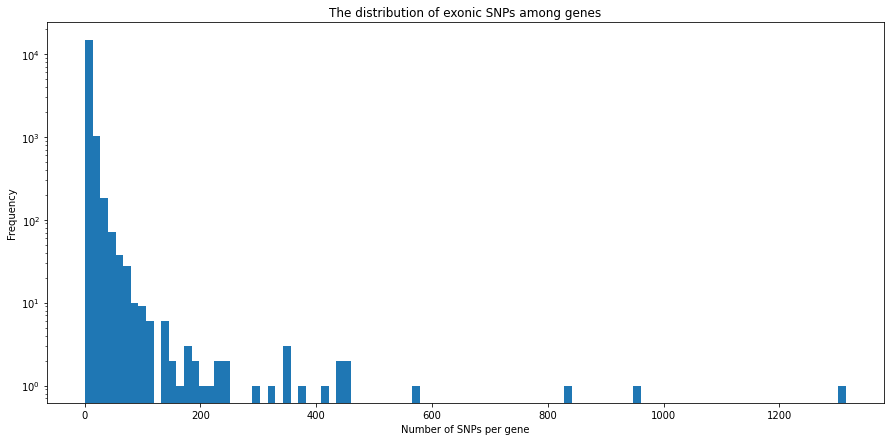

In [80]:
ax = curr_data['num_snps'].plot.hist(bins=100, logy=True, figsize=(15, 7), 
                                title='The distribution of exonic SNPs among genes')
ax.set_xlabel('Number of SNPs per gene')
ax.set_ylabel('Frequency')

### Plotting bar plot of the number of exonic SNPs per gene

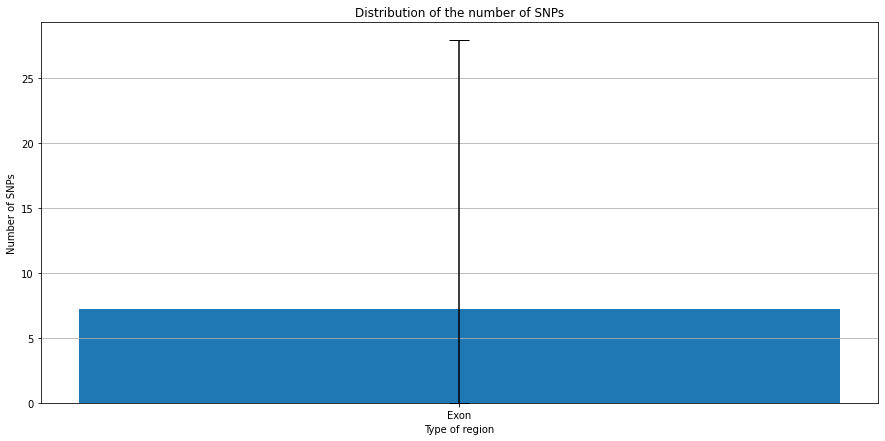

In [81]:
x_axis = [0]
x_tick_label = ['Exon']
y_axis = [curr_data['num_snps'].mean()]
y_error = np.array([[curr_data['num_snps'].mean(), curr_data['num_snps'].std()]]).T

fig, ax = plt.subplots(figsize=(15, 7))  # creating figure
ax.bar(x_axis, y_axis, yerr=y_error, capsize=10)  # bar plotting
ax.set_xlabel('Type of region')
ax.set_ylabel('Number of SNPs')
ax.set_xticks(x_axis)
ax.set_xticklabels(x_tick_label)
ax.set_title('Distribution of the number of SNPs')
ax.yaxis.grid(True)

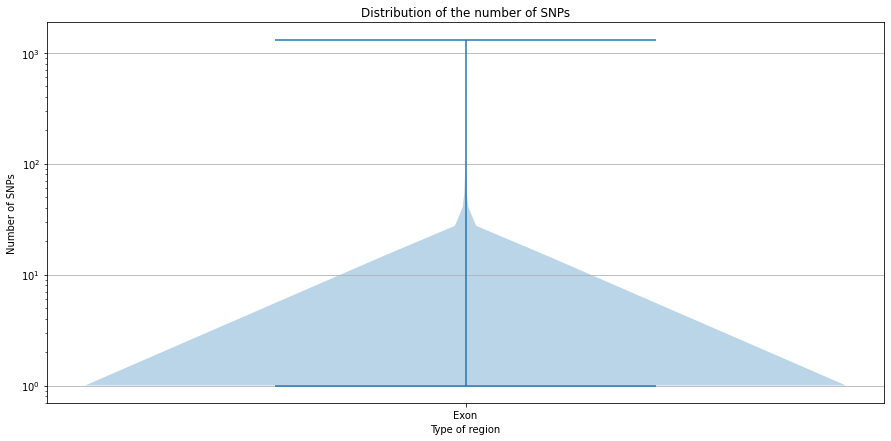

In [82]:
x_axis = [0]
x_tick_label = ['Exon']

fig, ax = plt.subplots(figsize=(15, 7))
ax.violinplot(curr_data['num_snps'], positions=x_axis)
ax.set_yscale('log')
ax.set_xlabel('Type of region')
ax.set_ylabel('Number of SNPs')
ax.set_xticks(x_axis)
ax.set_xticklabels(x_tick_label)
ax.set_title('Distribution of the number of SNPs')
ax.yaxis.grid(True)

### Plotting violin plot of the number of exonic SNPs per gene

<AxesSubplot:xlabel='num_snps'>

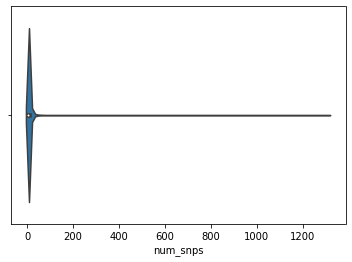

In [83]:
sns.violinplot(x=curr_data['num_snps'])

## Concatenating all data into one dataframe

In [84]:
all_data = pd.DataFrame()  # this dataframe will store the data from all datasets

for key, val in _DATAS.items():
    # Creating the column indicating the data type
    val['data_type'] = key
    
    # Creaing the column indicating the number of SNPs
    val['num_snps'] = 0
    for i, row in val.iterrows():  # taking a lot of time
        snp_list = row['start_pos_list']
        snp_arr = snp_list.split(',')
        val.loc[i, 'num_snps'] = len(snp_arr)

    # Concatenating the current val with the rest of data
    all_data = pd.concat([all_data, val], axis=0)

all_data

,chr,gene,start_pos_list,data_type,num_snps,distances
0,1,FAM87B,1:754105,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN
1,1,FAM41C,1:809876,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN
2,1,LOC100288175,"1:998501,1:998578",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN
3,1,LOC105378948,1:1004331,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN
4,1,LINC01342,"1:1078583,1:1079261",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN
...,...,...,...,...,...,...
4607,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14
4608,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14
4609,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504
4610,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715


In [85]:
all_data['num_snps'].isna().sum()  # checking that num_snps does not contain NaN

0

### Replace the values in `data_type` to pleasantly formatted values..

In [86]:
_FILES

['ncRNA_exonic_genetable_2022-07-13.txt',
 'intergenic_genetable_2022-07-13.txt',
 'exonic_genetable_2022-07-13.txt',
 'intronic_genetable_2022-07-13.txt',
 'upstream_genetable_2022-07-13.txt',
 'ncRNA_intronic_genetable_2022-07-13.txt',
 'exonic_splicing_combo_genetable_2022-07-13.txt',
 'mismatched_genes_df_step1.txt',
 'downstream_genetable_2022-07-13.txt']

In [87]:
# Creating a mapping dict
mapping_data_type = {
    'ncRNA_exonic_genetable_2022-07-13.txt': 'ncRNA_exonic',
    'intergenic_genetable_2022-07-13.txt': 'intergenic',
    'exonic_genetable_2022-07-13.txt': 'exonic',
    'intronic_genetable_2022-07-13.txt': 'intronic',
    'upstream_genetable_2022-07-13.txt': 'upstream',
    'ncRNA_intronic_genetable_2022-07-13.txt': 'ncRNA_intronic',
    'exonic_splicing_combo_genetable_2022-07-13.txt': 'exonic_splicing',
    'downstream_genetable_2022-07-13.txt': 'downstream'
}

In [88]:
all_data['data_type_formatted'] = all_data['data_type'].map(mapping_data_type)

In [89]:
all_data

,chr,gene,start_pos_list,data_type,num_snps,distances,data_type_formatted
0,1,FAM87B,1:754105,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
1,1,FAM41C,1:809876,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
2,1,LOC100288175,"1:998501,1:998578",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
3,1,LOC105378948,1:1004331,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
4,1,LINC01342,"1:1078583,1:1079261",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
...,...,...,...,...,...,...,...
4607,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4608,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4609,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504,downstream
4610,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715,downstream


In [90]:
all_data_processed = all_data.rename(columns={'data_type': 'raw_data_type', 'data_type_formatted': 'data_type'})
all_data_processed

,chr,gene,start_pos_list,raw_data_type,num_snps,distances,data_type
0,1,FAM87B,1:754105,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
1,1,FAM41C,1:809876,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
2,1,LOC100288175,"1:998501,1:998578",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
3,1,LOC105378948,1:1004331,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
4,1,LINC01342,"1:1078583,1:1079261",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
...,...,...,...,...,...,...,...
4607,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4608,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4609,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504,downstream
4610,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715,downstream


In [91]:
all_data_processed

,chr,gene,start_pos_list,raw_data_type,num_snps,distances,data_type
0,1,FAM87B,1:754105,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
1,1,FAM41C,1:809876,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
2,1,LOC100288175,"1:998501,1:998578",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
3,1,LOC105378948,1:1004331,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
4,1,LINC01342,"1:1078583,1:1079261",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
...,...,...,...,...,...,...,...
4607,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4608,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4609,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504,downstream
4610,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715,downstream


### Exploratory data analysis

In [92]:
# Checking how many genes do we have per `data_type`
all_data_processed['data_type'].value_counts()

intergenic         18369
exonic             16277
intronic           14909
downstream          4612
upstream            4465
ncRNA_intronic      3941
ncRNA_exonic        2476
exonic_splicing      148
Name: data_type, dtype: int64

In [93]:
# Checking how many genes do we have per `chromosome` and per `data_type`
data_types = all_data_processed['data_type'].unique()
for dt in data_types:
    tmp_df = all_data_processed[all_data_processed['data_type'] == dt]
    print(dt)
    print(tmp_df['chr'].value_counts())
    print()

ncRNA_exonic
1     214
6     184
2     166
3     139
7     139
5     136
10    126
17    126
12    121
11    103
8     103
4     102
19    101
9      98
15     92
13     89
16     88
14     86
20     73
22     69
21     66
18     55
Name: chr, dtype: int64

intergenic
1     1855
2     1301
11    1134
19    1127
6     1074
3     1053
12     966
5      966
17     939
7      928
4      864
10     783
8      746
9      741
16     691
14     612
15     584
20     535
13     476
22     390
18     339
21     265
Name: chr, dtype: int64

exonic
1     1765
19    1238
11    1141
2     1062
17    1005
3      942
6      912
12     891
7      777
5      736
16     711
9      675
10     647
4      630
8      559
14     532
15     498
20     451
22     387
13     275
18     237
21     206
Name: chr, dtype: int64

intronic
1     1577
19    1138
2     1031
11     889
3      879
17     846
6      839
12     832
5      730
7      713
16     648
4      632
10     598
9      584
8      558
14     484
15   

In [94]:
# Checking the number of SNPs per gene
all_data_processed.groupby('gene')['num_snps'].sum().sort_values(ascending=False)  # what is NONE?

gene
NONE            16768
CSMD1            2033
RBFOX1           1548
BRCA2            1345
MIR4454          1094
                ...  
SMIM27              1
RHBDL1              1
GPC2                1
SMIM22              1
LOC105369187        1
Name: num_snps, Length: 24096, dtype: int64

In [95]:
# Printing the summary statistics for all `data_type`s
data_types = all_data_processed['data_type'].unique()
for dt in data_types:
    tmp_df = all_data_processed[all_data_processed['data_type'] == dt]
    print(dt)
    print('Mean:', tmp_df['num_snps'].mean())
    print('Median:', tmp_df['num_snps'].median())
    print('STD:', tmp_df['num_snps'].std())
    print()

ncRNA_exonic
Mean: 1.898626817447496
Median: 1.0
STD: 2.5356891224535034

intergenic
Mean: 35.801948935706896
Median: 12.0
STD: 88.33302555840872

exonic
Mean: 7.247465749216686
Median: 4.0
STD: 20.612457025135537

intronic
Mean: 17.86498088402978
Median: 7.0
STD: 39.277313454394566

upstream
Mean: 1.2568868980963046
Median: 1.0
STD: 0.6697426898318712

ncRNA_intronic
Mean: 11.179649835067242
Median: 4.0
STD: 20.4172516379135

exonic_splicing
Mean: 1.027027027027027
Median: 1.0
STD: 0.2002021409070202

nan
Mean: nan
Median: nan
STD: nan

downstream
Mean: 1.2523850823937555
Median: 1.0
STD: 0.6923418128931796



/opt/homebrew/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:614: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


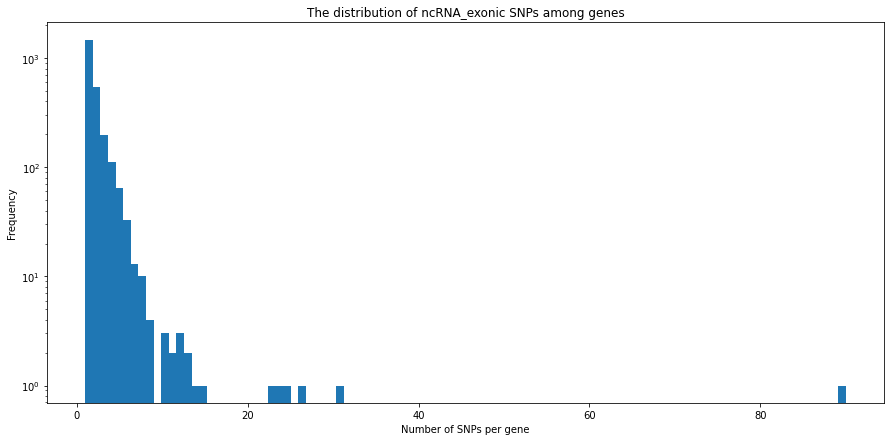

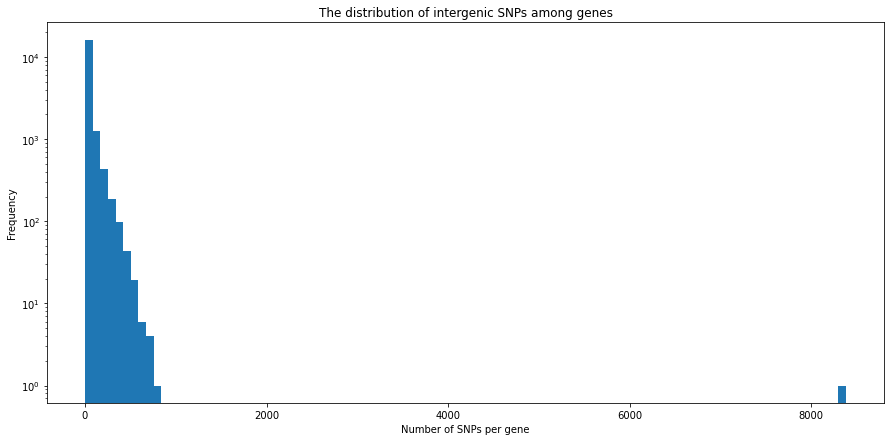

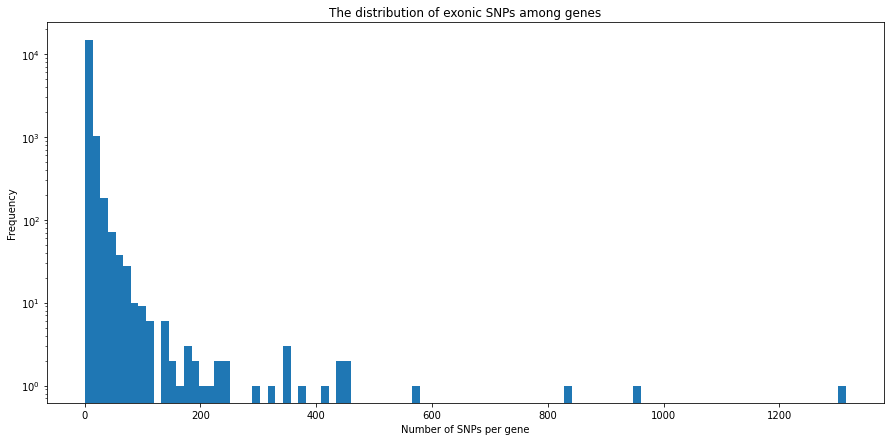

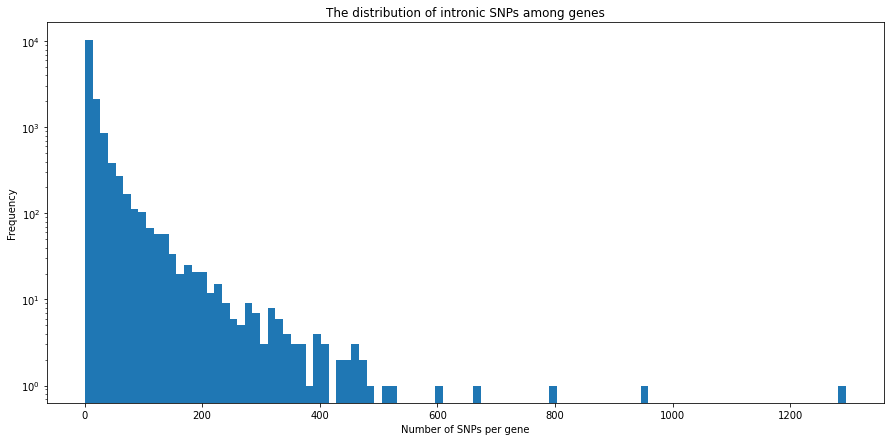

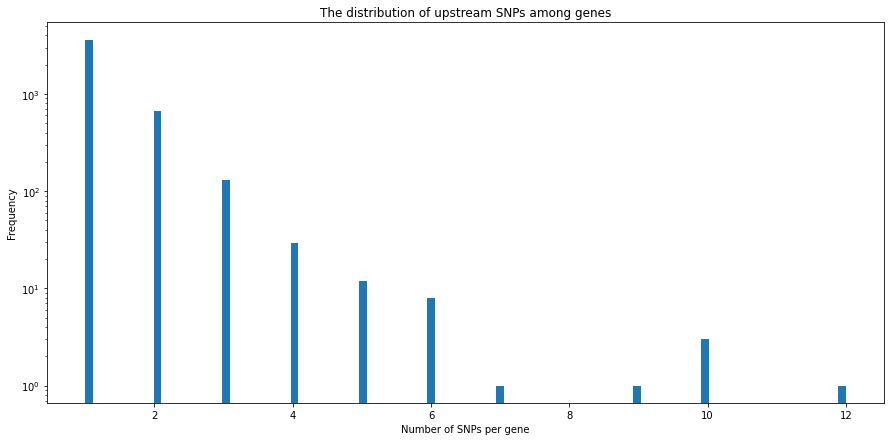

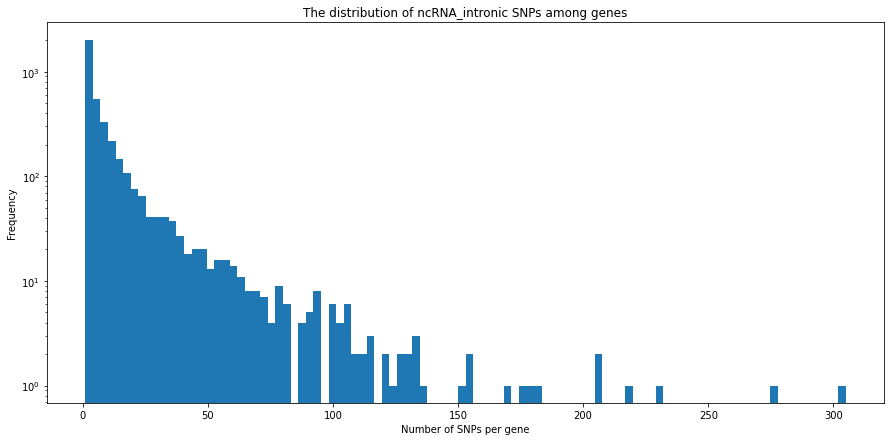

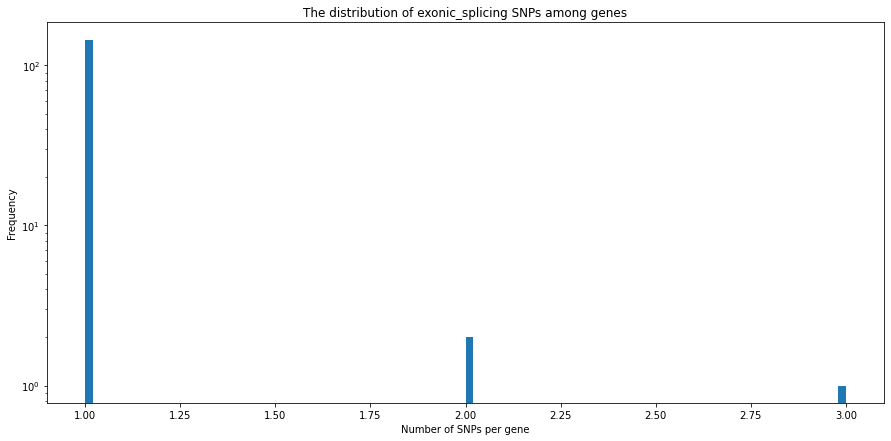

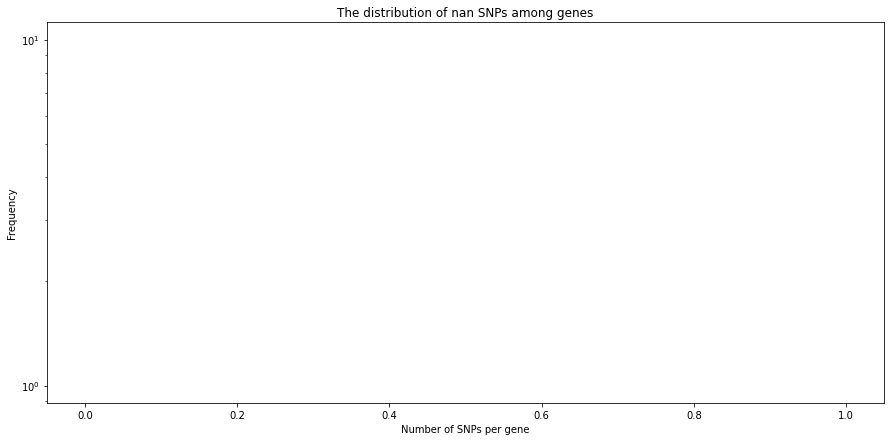

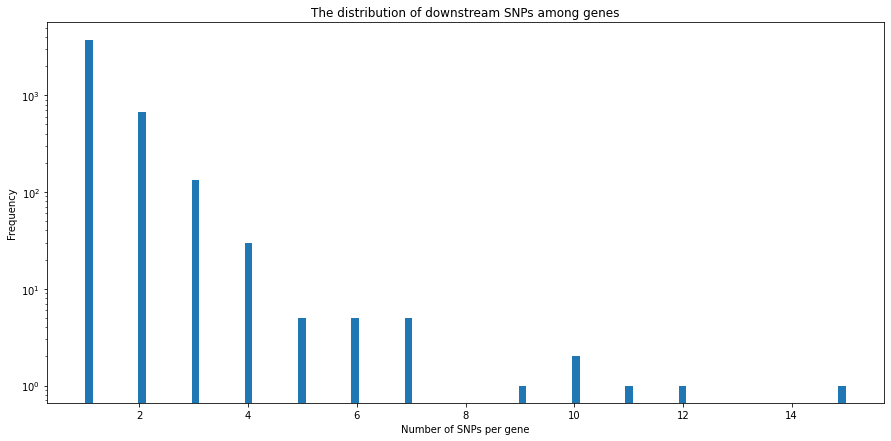

In [96]:
# Plotting histogram of the `num_snps` for all `data_type`s
data_types = all_data_processed['data_type'].unique()
for dt in data_types:
    tmp_df = all_data_processed[all_data_processed['data_type'] == dt]
    f, ax = plt.subplots()
    tmp_df['num_snps'].plot.hist(ax=ax, bins=100, logy=True, figsize=(15, 7), 
                                 title=f'The distribution of {dt} SNPs among genes')
    ax.set_xlabel('Number of SNPs per gene');

In [97]:
all_data_processed

,chr,gene,start_pos_list,raw_data_type,num_snps,distances,data_type
0,1,FAM87B,1:754105,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
1,1,FAM41C,1:809876,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
2,1,LOC100288175,"1:998501,1:998578",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
3,1,LOC105378948,1:1004331,ncRNA_exonic_genetable_2022-07-13.txt,1,NaN,ncRNA_exonic
4,1,LINC01342,"1:1078583,1:1079261",ncRNA_exonic_genetable_2022-07-13.txt,2,NaN,ncRNA_exonic
...,...,...,...,...,...,...,...
4607,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4608,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
4609,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504,downstream
4610,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715,downstream


In [98]:
data_types

array(['ncRNA_exonic', 'intergenic', 'exonic', 'intronic', 'upstream',
       'ncRNA_intronic', 'exonic_splicing', nan, 'downstream'],
      dtype=object)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (9,).

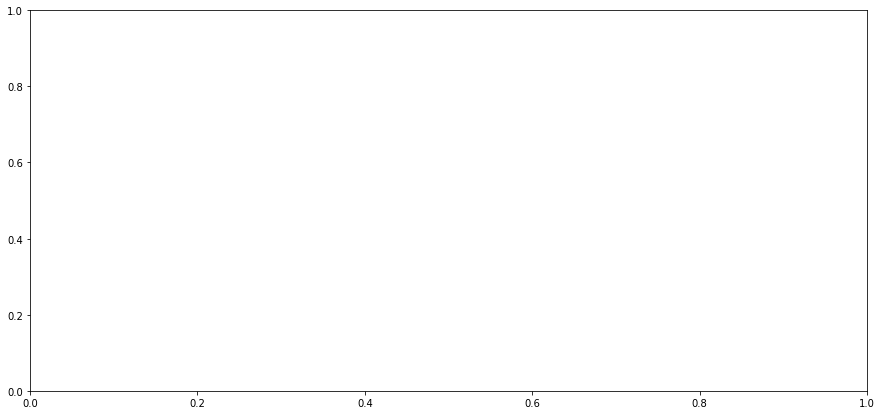

In [99]:
# Plotting bar plots of the `num_snps` for all `data_type`s

x_axis = range(8)
x_tick_label = data_types
y_axis = []
y_error = []

data_types = all_data_processed['data_type'].unique()
for dt in data_types:
    tmp_df = all_data_processed[all_data_processed['data_type'] == dt]
    y_axis.append(tmp_df['num_snps'].mean())
    y_error.append(tmp_df['num_snps'].std())

fig, ax = plt.subplots(figsize=(15, 7))  # creating figure
ax.bar(x_axis, y_axis, yerr=y_error, capsize=10)  # bar plotting
ax.set_xlabel('Type of region')
ax.set_ylabel('Number of SNPs')
ax.set_yscale('log')  # comment this if without log scale on y axis
ax.set_xticks(x_axis)
ax.set_xticklabels(x_tick_label)
ax.set_title('Distribution of the number of SNPs')
ax.yaxis.grid(True)

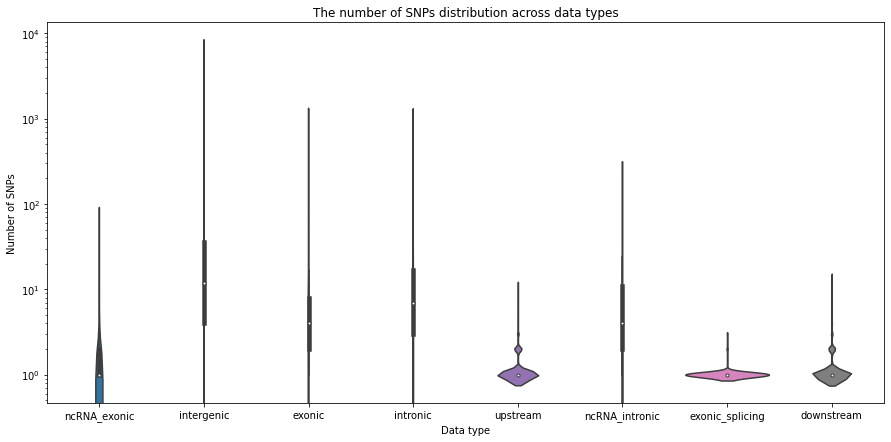

In [100]:
# Plotting the violin plot of the `num_snps` for all `data_type`s
f, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(x="data_type", y="num_snps", data=all_data_processed, ax=ax)
ax.set_yscale('log')
ax.set_xlabel('Data type')
ax.set_ylabel('Number of SNPs')
ax.set_title('The number of SNPs distribution across data types');

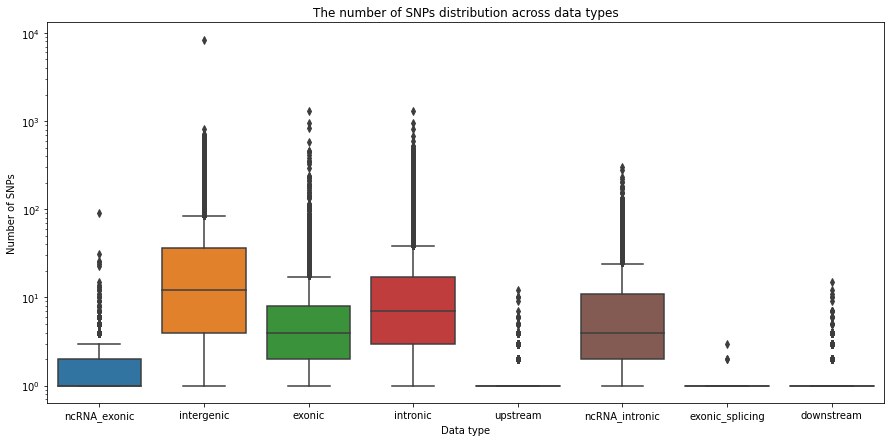

In [101]:
# Plotting the violin plot of the `num_snps` for all `data_type`s
f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="data_type", y="num_snps", data=all_data_processed, ax=ax)
ax.set_yscale('log')
ax.set_xlabel('Data type')
ax.set_ylabel('Number of SNPs')
ax.set_title('The number of SNPs distribution across data types');

### Looking at the distances of the SNPs to genes (only for intergenic, downstream and upstream data types)

In [102]:
distance_data = all_data_processed[
    all_data_processed['data_type'].isin(['intergenic', 'downstream', 'upstream'])
].reset_index(drop=True)  # Dropping the old index, creating a new one from 0 to len(distance_data)
distance_data

,chr,gene,start_pos_list,raw_data_type,num_snps,distances,data_type
0,1,LOC100288069,"1:723307,1:727841,1:729632",intergenic_genetable_2022-07-13.txt,3,"9293,13827,15618",intergenic
1,1,FAM87B,"1:723307,1:727841,1:729632,1:756604,1:759036",intergenic_genetable_2022-07-13.txt,5,"29444,24910,23119,1390,3822",intergenic
2,1,LINC00115,"1:756604,1:759036",intergenic_genetable_2022-07-13.txt,2,"1390,2550",intergenic
3,1,LINC01128,1:801536,intergenic_genetable_2022-07-13.txt,1,6710,intergenic
4,1,FAM41C,"1:801536,1:834830,1:835092,1:835499,1:836684,1...",intergenic_genetable_2022-07-13.txt,10,"1915,22648,22910,23317,24502,26373,28571,34682...",intergenic
...,...,...,...,...,...,...,...
27441,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
27442,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream
27443,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504,downstream
27444,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715,downstream


In [103]:
# Calculate the average distance per gene, the STD per gene, and median per gene
distance_data['mean_dist'] = 0
distance_data['std_dist'] = 0
distance_data['median_dist'] = 0
for i, row in distance_data.iterrows():
    curr_str_distances = row['distances']
    list_distances = curr_str_distances.split(',')
    num_list_distances = [int(elem) for elem in list_distances]
    distance_data.loc[i, 'mean_dist'] = np.mean(num_list_distances)
    distance_data.loc[i, 'std_dist'] = np.std(num_list_distances)
    distance_data.loc[i, 'median_dist'] = np.median(num_list_distances)
distance_data

,chr,gene,start_pos_list,raw_data_type,num_snps,distances,data_type,mean_dist,std_dist,median_dist
0,1,LOC100288069,"1:723307,1:727841,1:729632",intergenic_genetable_2022-07-13.txt,3,"9293,13827,15618",intergenic,12912.666667,2661.880330,13827.0
1,1,FAM87B,"1:723307,1:727841,1:729632,1:756604,1:759036",intergenic_genetable_2022-07-13.txt,5,"29444,24910,23119,1390,3822",intergenic,16537.000000,11585.536984,23119.0
2,1,LINC00115,"1:756604,1:759036",intergenic_genetable_2022-07-13.txt,2,"1390,2550",intergenic,1970.000000,580.000000,1970.0
3,1,LINC01128,1:801536,intergenic_genetable_2022-07-13.txt,1,6710,intergenic,6710.000000,0.000000,6710.0
4,1,FAM41C,"1:801536,1:834830,1:835092,1:835499,1:836684,1...",intergenic_genetable_2022-07-13.txt,10,"1915,22648,22910,23317,24502,26373,28571,34682...",intergenic,26133.200000,9952.839060,25437.5
...,...,...,...,...,...,...,...,...,...,...
27441,22,SELENOO,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream,14.000000,0.000000,14.0
27442,22,TUBGCP6,22:50656109,downstream_genetable_2022-07-13.txt,1,14,downstream,14.000000,0.000000,14.0
27443,22,MIOX,22:50929581,downstream_genetable_2022-07-13.txt,1,504,downstream,504.000000,0.000000,504.0
27444,22,LOC105373100,22:51173542,downstream_genetable_2022-07-13.txt,1,715,downstream,715.000000,0.000000,715.0


<AxesSubplot:title={'center':'Average distance per gene'}, ylabel='Frequency'>

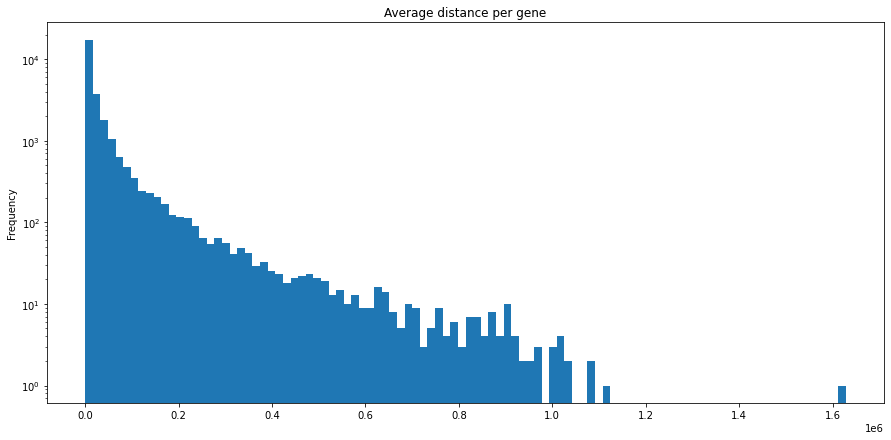

In [104]:
# Plotting the average distance distribution
distance_data['mean_dist'].plot.hist(figsize=(15, 7), title='Average distance per gene', 
                                     xlabel='Distance', logy=True, bins=100)

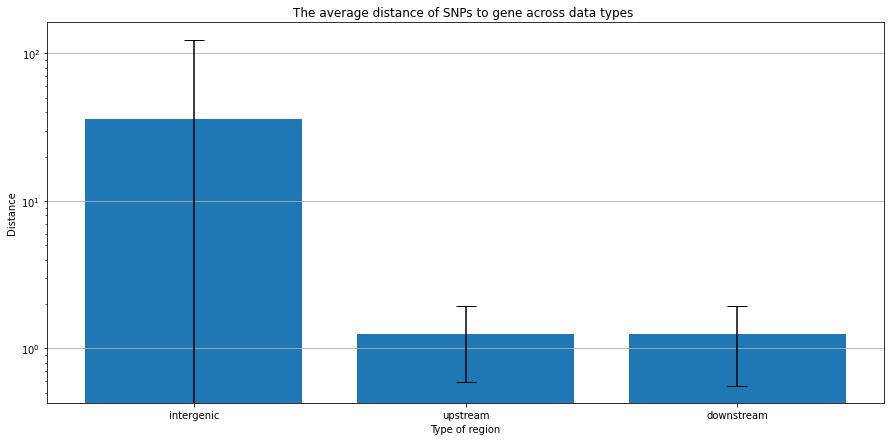

In [112]:
# Plotting bar plots of the `mean_dist` for all `data_type`s

x_axis = range(3)
data_types = distance_data['data_type'].unique()
x_tick_label = x_tick_label
y_axis = []
y_error = []

for dt in data_types:
    tmp_df = distance_data[distance_data['data_type'] == dt]
    y_axis.append(tmp_df['num_snps'].mean())
    y_error.append(tmp_df['num_snps'].std())

fig, ax = plt.subplots(figsize=(15, 7))  # creating figure
ax.bar(x_axis, y_axis, yerr=y_error, capsize=10)  # bar plotting
ax.set_xlabel('Type of region')
ax.set_ylabel('Distance')
ax.set_yscale('log')  # comment this if without log scale on y axis
ax.set_xticks(x_axis)
ax.set_xticklabels(x_tick_label)
ax.set_title('The average distance of SNPs to gene across data types ')
ax.yaxis.grid(True)

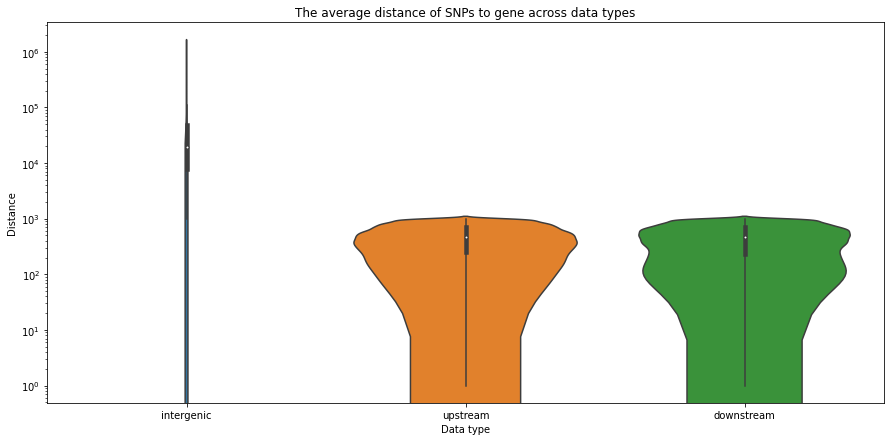

In [113]:
# Plotting the average distance violin plot for different data types
f, ax = plt.subplots(figsize=(15, 7))
sns.violinplot(x="data_type", y="mean_dist", data=distance_data, ax=ax)
ax.set_yscale('log')
ax.set_xlabel('Data type')
ax.set_ylabel('Distance')
ax.set_title('The average distance of SNPs to gene across data types');

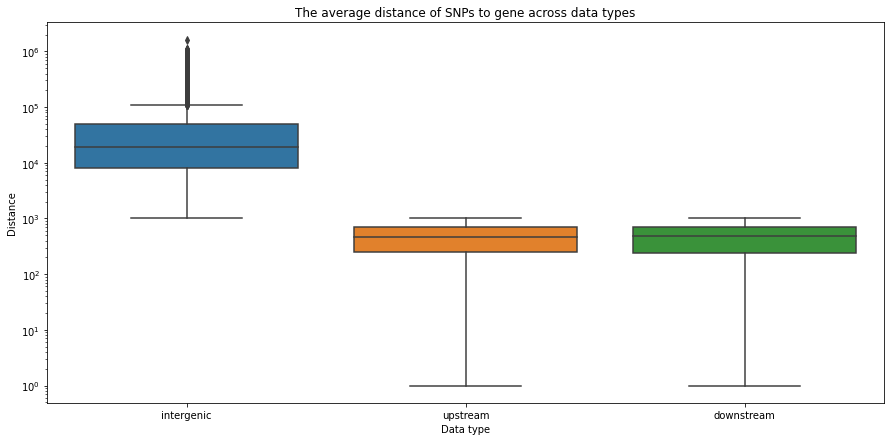

In [114]:
# Plotting the average distance violin plot for different data types
f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(x="data_type", y="mean_dist", data=distance_data, ax=ax)
ax.set_yscale('log')
ax.set_xlabel('Data type')
ax.set_ylabel('Distance')
ax.set_title('The average distance of SNPs to gene across data types');

### The scatter plot between different data types

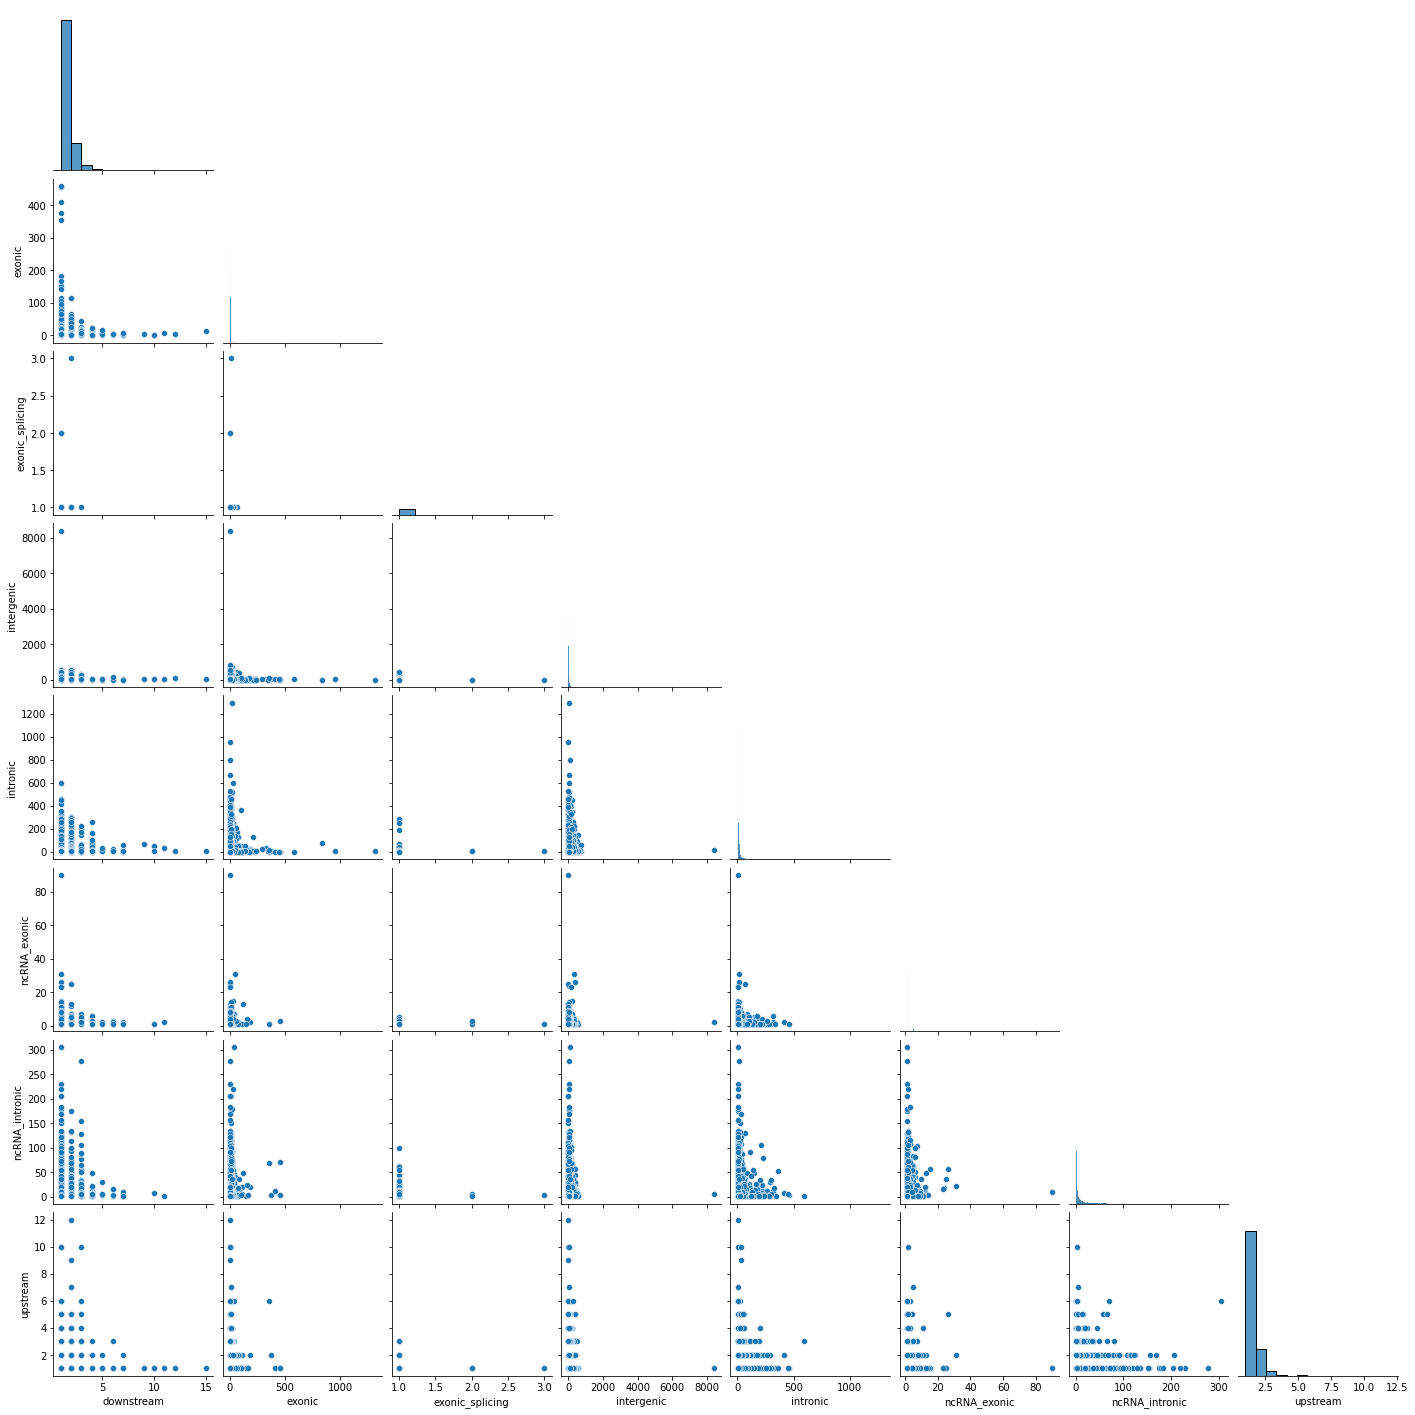

In [132]:
tmp_data = all_data_processed[['num_snps', 'data_type']].pivot(columns='data_type', values='num_snps')
sns.pairplot(tmp_data, corner=True)

### Network analysis of graphs based on connections between SNPs and genes

In [8]:
# Test run to load the data
data_test = np.load('adjacency_files_joseph/chr1_adjacency_nodes1.npz')
data_array = data_test['array']

In [21]:
data_array.shape

(63487, 2491)

In [27]:
np.sum(data_array)

410562.0

In [22]:
# Test run to load the data
data_test = np.load('adjacency_files_joseph/chr1_adjacency_nodes2.npz')
data_array = data_test['array']

In [23]:
data_array.shape

(63487, 4982)

In [24]:
# Test run to load the data
data_test = np.load('adjacency_files_joseph/chr1_adjacency_nodes3.npz')
data_array = data_test['array']

In [25]:
data_array.shape

(63487, 7473)